<a href="https://colab.research.google.com/github/u1353279/DEEP-LEARNING/blob/master/vGG16_Lung_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Predicting Lung Disease***

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/valid'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:

# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
163/163 [==============================] - 4308s 26s/step - loss: 0.1895 - accuracy: 0.9216 - val_loss: 0.3214 - val_accuracy: 0.9038


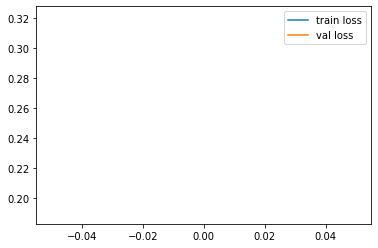

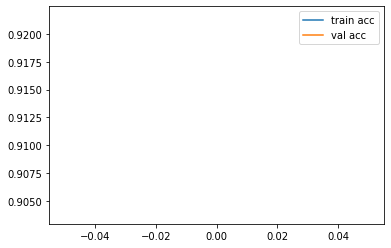

<Figure size 432x288 with 0 Axes>

In [25]:
print(r.history.keys())
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [26]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

In [27]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('model_vgg16.h5')

In [32]:
img=image.load_img('/content/drive/My Drive/Colab Notebooks/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size=(224,224))

In [33]:
b=image.img_to_array(img)
b=np.expand_dims(b,axis=0)

In [34]:
img_data=preprocess_input(b)
classes=model.predict(img_data)

In [35]:
classes

array([[1., 0.]], dtype=float32)